In [1]:
import pandas as pd
import pygwalker as pyg
import pathlib
import numpy as np
from ydata_profiling import ProfileReport
from tools.dataset import get_dataset
from IPython.display import display, Markdown, Latex
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000 # avoid matplotlib overflow error
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '11'
import sweetviz
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Book1.csv")
df

,future_sales-explainable_boosting,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,0.01925667,0.02623939,0.026787711,0.028647073,0.0334089,0.035607644,0.042904482,0.043787911,0.06131368,0.078195693,0.110168742,0.14921871,0.153091407,NaN
1,hour,day,item_id&day_of_week,day_of_week,item_price&day,month,item_price&day_of_week,item_id&month,item_price&month,shop_id&item_id,shop_id&item_price,shop_id,item_price,item_id,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,livestock_meat_import-explainable_boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,534792.2279,689192.615,765514.569,1076963.61,1498578.142,2386087.376,2494527.309,2882089.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GEOGRAPHY_DESC&UNIT_DESC,GEOGRAPHY_DESC,UNIT_DESC,GEOGRAPHY_CODE,HS_CODE&GEOGRAPHY_DESC,HS_CODE&GEOGRAPHY_CODE,HS_CODE,HS_CODE&UNIT_DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = pd.read_csv("all-results-raw.csv")
df.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,ablation,dataset,...,feature_rolling_mean,feature_shop_id,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse
0,2024-05-03 16:23:38,13.6min,02396ff4d082427295bec5f307979a3e,useful-snipe-385,LOCAL,main.py,redcof,FINISHED,-1,livestock_meat_import,...,NaN,NaN,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06
1,2024-05-03 16:12:14,11.4min,48622cacc07a4dbba7159c52798631e8,bald-stork-939,LOCAL,main.py,redcof,FINISHED,-1,livestock_meat_import,...,NaN,NaN,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06
2,2024-05-03 15:30:04,42.1min,896af5db592f4cb29f9c4f2dfb86bc88,fearless-chimp-406,LOCAL,main.py,redcof,FINISHED,-1,future_sales,...,NaN,0.000000,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00
3,2024-05-03 12:52:32,2.6h,9b36df0090204852892a95f4621ff9ae,righteous-crow-932,LOCAL,main.py,redcof,FINISHED,-1,future_sales,...,NaN,0.011804,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00
4,2024-05-03 12:25:53,26.6min,a4e284699fb74af1a1b8bf53698cd1a5,rumbling-gnu-969,LOCAL,main.py,redcof,FINISHED,-1,product_demand,...,NaN,NaN,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04


In [3]:
df["dataset"].unique()

array(['livestock_meat_import', 'future_sales', 'product_demand',
       'online_retail_2', 'online_retail'], dtype=object)

In [4]:
df.columns

Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'ablation', 'dataset', 'extra_feat',
       'feature_count', 'features', 'model', 'test_size', 'time_period',
       'time_period_sec_test', 'time_period_sec_train', 'time_period_sec_txt',
       'time_period_test_txt', 'time_period_train_txt', 'train_size',
       'feature_Country', 'feature_Customer ID', 'feature_CustomerID',
       'feature_GEOGRAPHY_CODE', 'feature_GEOGRAPHY_DESC', 'feature_HS_CODE',
       'feature_Price', 'feature_Product_Category', 'feature_Product_Code',
       'feature_StockCode', 'feature_UNIT_DESC', 'feature_UnitPrice',
       'feature_Warehouse', 'feature_day', 'feature_day_of_week',
       'feature_fourier_transform', 'feature_hour', 'feature_item_id',
       'feature_item_price', 'feature_lag_1', 'feature_lag_2', 'feature_lag_3',
       'feature_month', 'feature_rolling_mean', 'feature_shop_id', 'test_mae',
       'test_mape', 'test_mse', 'test_rmse',

## Feature Importance

In [5]:

dataset_name = "livestock_meat_import"
dfs, target, timeseries_col, dataset_name = get_dataset(dataset_name, ablation_limit=-1, is_extra_feature_enabled=False, label_encoding=True)
dfs.columns

Index(['HS_CODE', 'GEOGRAPHY_CODE', 'GEOGRAPHY_DESC', 'UNIT_DESC', 'AMOUNT',
       'DATE'],
      dtype='object')

In [6]:
# dataset_cols = dict()
# for dataset_name in df["dataset"].unique():
#     dfs, target, timeseries_col, dataset_name = get_dataset(dataset_name, ablation_limit=10, is_extra_feature_enabled=False, label_encoding=True)
    # dataset_cols[dataset_name] = list(map(lambda x: "feature_%s"%x, dfs.columns))
dataset_cols = {'livestock_meat_import': ['feature_HS_CODE',
  'feature_GEOGRAPHY_CODE',
  'feature_GEOGRAPHY_DESC',
  'feature_UNIT_DESC',
  'feature_AMOUNT',
  'feature_DATE'],
 'future_sales': ['feature_date',
  'feature_shop_id',
  'feature_item_id',
  'feature_item_price',
  'feature_item_cnt_day',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'product_demand': ['feature_Product_Code',
  'feature_Warehouse',
  'feature_Product_Category',
  'feature_Date',
  'feature_Order_Demand',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'online_retail_2': ['feature_StockCode',
  'feature_Quantity',
  'feature_InvoiceDate',
  'feature_Price',
  'feature_Customer ID',
  'feature_Country',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'online_retail': ['feature_StockCode',
  'feature_Quantity',
  'feature_InvoiceDate',
  'feature_UnitPrice',
  'feature_CustomerID',
  'feature_Country',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week']}
dataset_cols

{'livestock_meat_import': ['feature_HS_CODE',
  'feature_GEOGRAPHY_CODE',
  'feature_GEOGRAPHY_DESC',
  'feature_UNIT_DESC',
  'feature_AMOUNT',
  'feature_DATE'],
 'future_sales': ['feature_date',
  'feature_shop_id',
  'feature_item_id',
  'feature_item_price',
  'feature_item_cnt_day',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'product_demand': ['feature_Product_Code',
  'feature_Warehouse',
  'feature_Product_Category',
  'feature_Date',
  'feature_Order_Demand',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'online_retail_2': ['feature_StockCode',
  'feature_Quantity',
  'feature_InvoiceDate',
  'feature_Price',
  'feature_Customer ID',
  'feature_Country',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'online_retail': ['feature_StockCode',
  'feature_Quantity',
  'feature_InvoiceDate',
  'feature_UnitPrice',
  'feature_CustomerID',
  'feature_Country',
  'feature_day',
  '

### Clean missing columns

In [7]:
import ast
missing_cols = dict()
for dataset_name in df["dataset"].unique():
    try:
        df[dataset_cols[dataset_name]]
    except KeyError as e:
        # collect missing columns
        missings = ast.literal_eval(str(e).replace(" not in index\"","").replace("\"",""))
        # missing_cols[dataset_name]=missings)
        # remove unavailable columns
        dataset_cols[dataset_name] = [col for col in dataset_cols[dataset_name] if col not in missings]
dataset_cols

{'livestock_meat_import': ['feature_HS_CODE',
  'feature_GEOGRAPHY_CODE',
  'feature_GEOGRAPHY_DESC',
  'feature_UNIT_DESC'],
 'future_sales': ['feature_shop_id',
  'feature_item_id',
  'feature_item_price',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'product_demand': ['feature_Product_Code',
  'feature_Warehouse',
  'feature_Product_Category',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'online_retail_2': ['feature_StockCode',
  'feature_Price',
  'feature_Customer ID',
  'feature_Country',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week'],
 'online_retail': ['feature_StockCode',
  'feature_UnitPrice',
  'feature_CustomerID',
  'feature_Country',
  'feature_day',
  'feature_month',
  'feature_hour',
  'feature_day_of_week']}

In [36]:
for model in df["model"].unique():
    for dataset_name in df["dataset"].unique():
        cols = [c for c in dataset_cols[dataset_name]]
        dfk = df[(df['model']== model) & (df['dataset'] == dataset_name) & (df["extra_feat"] == False)][cols].fillna(0).T
        dfk.columns=["Importance Score"]
        dfk = dfk.sort_values(by=dfk.columns[0])
        print("%s-%s"%(dataset_name, model))
        display(dfk)
        
        

livestock_meat_import-tabnet


,Importance Score
feature_HS_CODE,0.054559
feature_GEOGRAPHY_CODE,0.181857
feature_UNIT_DESC,0.206944
feature_GEOGRAPHY_DESC,0.556640


future_sales-tabnet


,Importance Score
feature_shop_id,0.000000
feature_hour,0.000000
feature_item_id,0.008411
feature_month,0.045033
feature_day_of_week,0.046975
feature_day,0.301522
feature_item_price,0.598059


product_demand-tabnet


,Importance Score
feature_day,0.000000
feature_hour,0.000000
feature_day_of_week,0.007417
feature_Warehouse,0.047113
feature_month,0.233608
feature_Product_Category,0.300932
feature_Product_Code,0.410929


online_retail_2-tabnet


,Importance Score
feature_StockCode,0.000000
feature_month,0.000000
feature_Customer ID,0.008145
feature_day_of_week,0.038331
feature_Country,0.137044
feature_day,0.157537
feature_hour,0.192733
feature_Price,0.466210


online_retail-tabnet


,Importance Score
feature_StockCode,0.000000
feature_Country,0.000000
feature_day,0.000003
feature_month,0.000023
feature_day_of_week,0.005775
feature_hour,0.196893
feature_UnitPrice,0.209611
feature_CustomerID,0.587694


livestock_meat_import-ssl+tabnet


,Importance Score
feature_GEOGRAPHY_DESC,0.181661
feature_HS_CODE,0.252159
feature_UNIT_DESC,0.265950
feature_GEOGRAPHY_CODE,0.300230


future_sales-ssl+tabnet


,Importance Score
feature_day,0.000000
feature_hour,0.000000
feature_day_of_week,0.000000
feature_shop_id,0.011804
feature_month,0.035642
feature_item_price,0.078673
feature_item_id,0.873880


product_demand-ssl+tabnet


,Importance Score
feature_day,0.000000
feature_month,0.000000
feature_hour,0.000000
feature_day_of_week,0.000000
feature_Product_Category,0.116264
feature_Product_Code,0.424113
feature_Warehouse,0.459623


online_retail_2-ssl+tabnet


,Importance Score
feature_StockCode,0.000000
feature_Price,0.000000
feature_month,0.010926
feature_Country,0.096985
feature_Customer ID,0.157807
feature_hour,0.221061
feature_day_of_week,0.228587
feature_day,0.284633


online_retail-ssl+tabnet


,Importance Score
feature_day,0.000000e+00
feature_month,3.646980e-07
feature_StockCode,1.462751e-04
feature_CustomerID,1.488845e-02
feature_hour,8.195776e-02
feature_day_of_week,2.547382e-01
feature_Country,2.568128e-01
feature_UnitPrice,3.914561e-01


livestock_meat_import-explainable_boosting


,Importance Score
feature_HS_CODE,0.0
feature_GEOGRAPHY_CODE,0.0
feature_GEOGRAPHY_DESC,0.0
feature_UNIT_DESC,0.0


future_sales-explainable_boosting


,Importance Score
feature_shop_id,0.0
feature_item_id,0.0
feature_item_price,0.0
feature_day,0.0
feature_month,0.0
feature_hour,0.0
feature_day_of_week,0.0


product_demand-explainable_boosting


,Importance Score
feature_Product_Code,0.0
feature_Warehouse,0.0
feature_Product_Category,0.0
feature_day,0.0
feature_month,0.0
feature_hour,0.0
feature_day_of_week,0.0


online_retail_2-explainable_boosting


,Importance Score
feature_StockCode,0.0
feature_Price,0.0
feature_Customer ID,0.0
feature_Country,0.0
feature_day,0.0
feature_month,0.0
feature_hour,0.0
feature_day_of_week,0.0


online_retail-explainable_boosting


,Importance Score
feature_StockCode,0.0
feature_UnitPrice,0.0
feature_CustomerID,0.0
feature_Country,0.0
feature_day,0.0
feature_month,0.0
feature_hour,0.0
feature_day_of_week,0.0


livestock_meat_import-xgboost


,Importance Score
feature_GEOGRAPHY_DESC,0.032248
feature_UNIT_DESC,0.179357
feature_HS_CODE,0.303604
feature_GEOGRAPHY_CODE,0.484790


future_sales-xgboost


,Importance Score
feature_hour,0.000000
feature_day_of_week,0.086325
feature_month,0.092240
feature_item_id,0.101317
feature_day,0.178397
feature_item_price,0.246779
feature_shop_id,0.294942


product_demand-xgboost


,Importance Score
feature_hour,0.000000
feature_month,0.029368
feature_day,0.033052
feature_Product_Category,0.067394
feature_Warehouse,0.210813
feature_Product_Code,0.270956
feature_day_of_week,0.388418


online_retail_2-xgboost


,Importance Score
feature_Price,0.043068
feature_hour,0.056759
feature_Customer ID,0.060713
feature_month,0.083544
feature_day_of_week,0.109082
feature_StockCode,0.131626
feature_day,0.193257
feature_Country,0.321950


online_retail-xgboost


,Importance Score
feature_day,0.055004
feature_day_of_week,0.055373
feature_CustomerID,0.075831
feature_hour,0.100171
feature_Country,0.109660
feature_StockCode,0.140355
feature_UnitPrice,0.181754
feature_month,0.281852


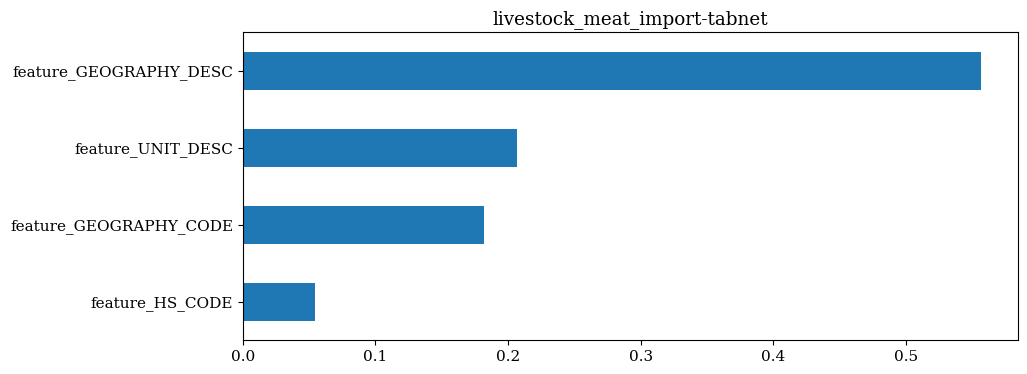

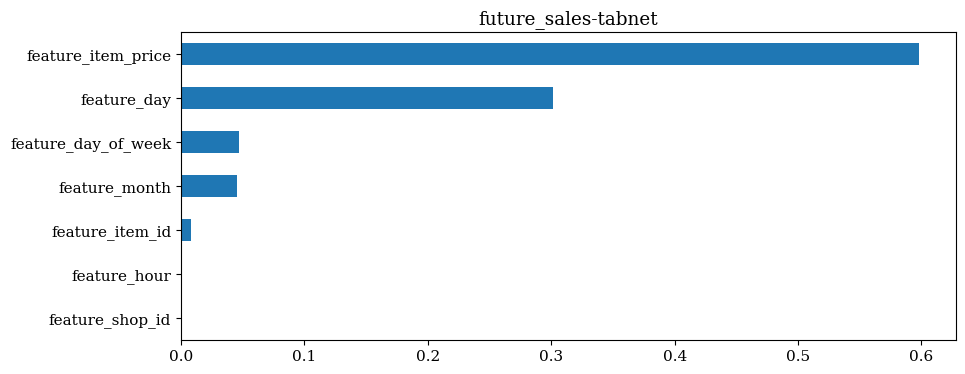

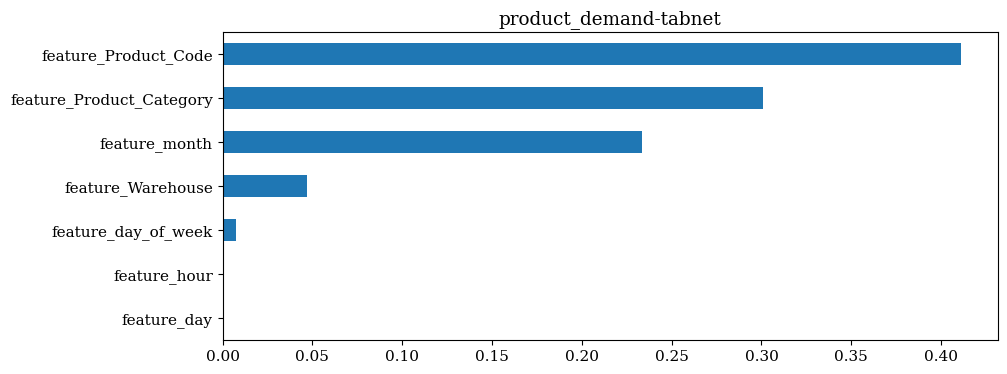

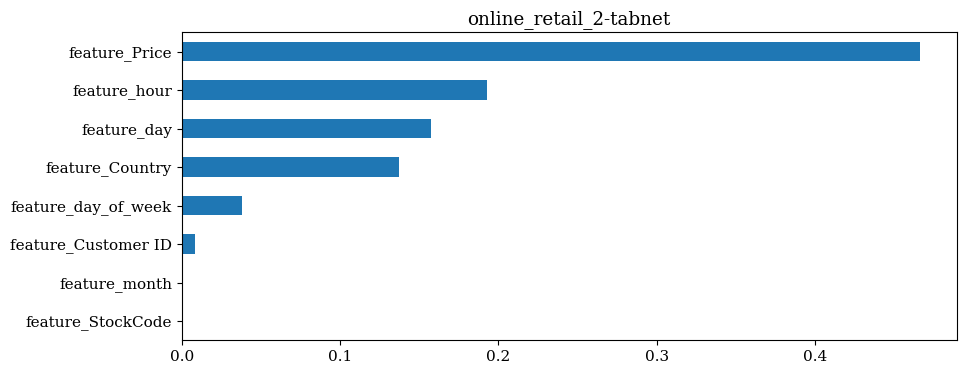

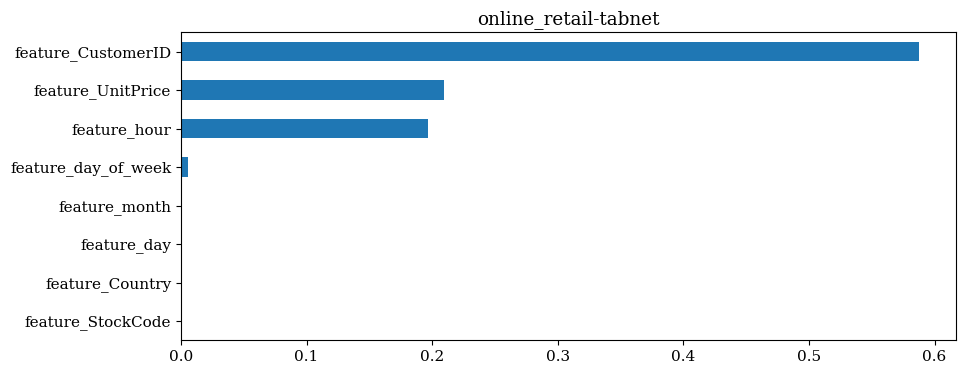

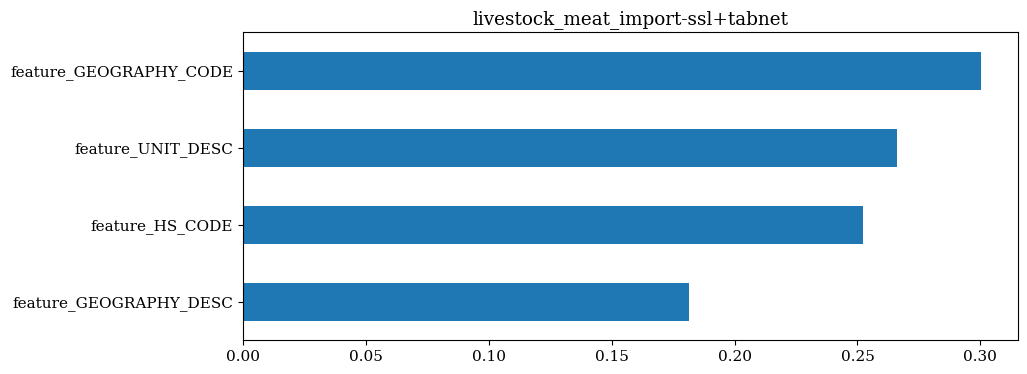

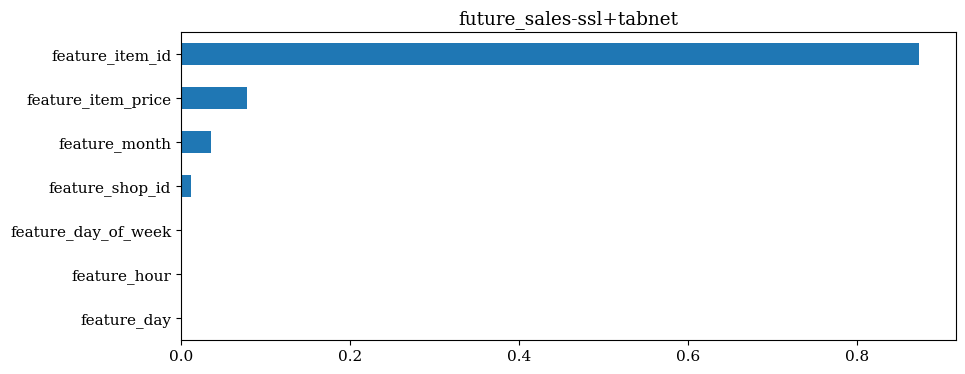

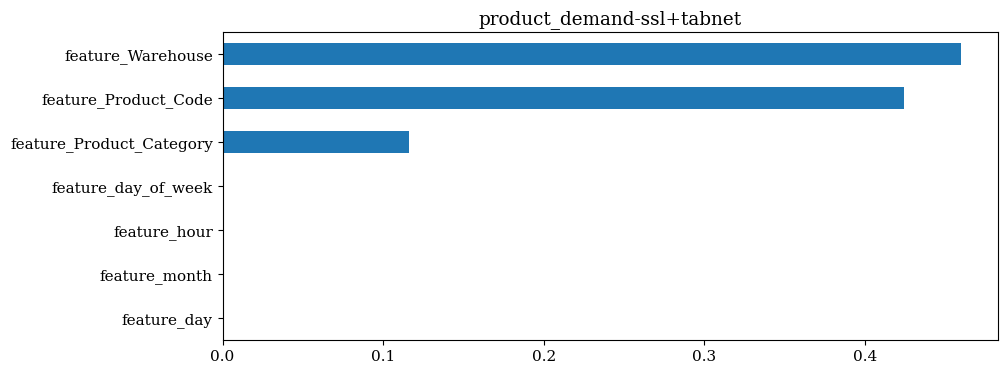

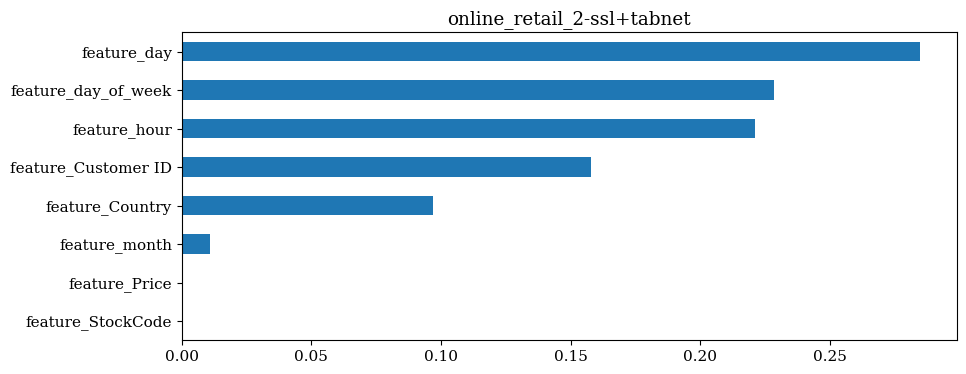

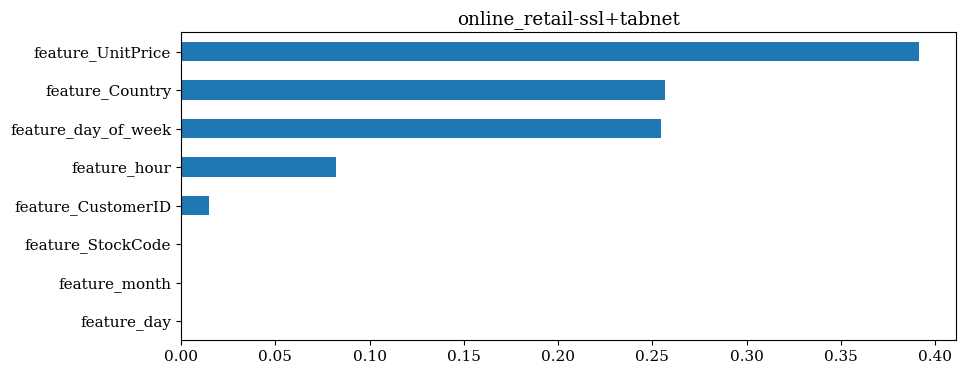

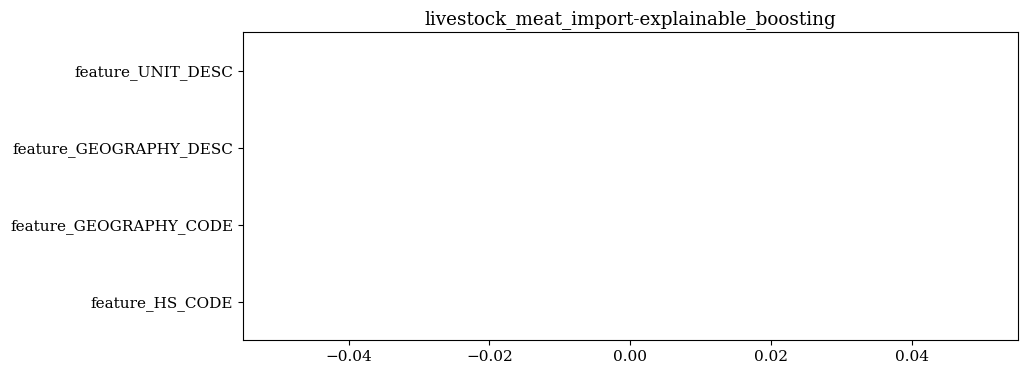

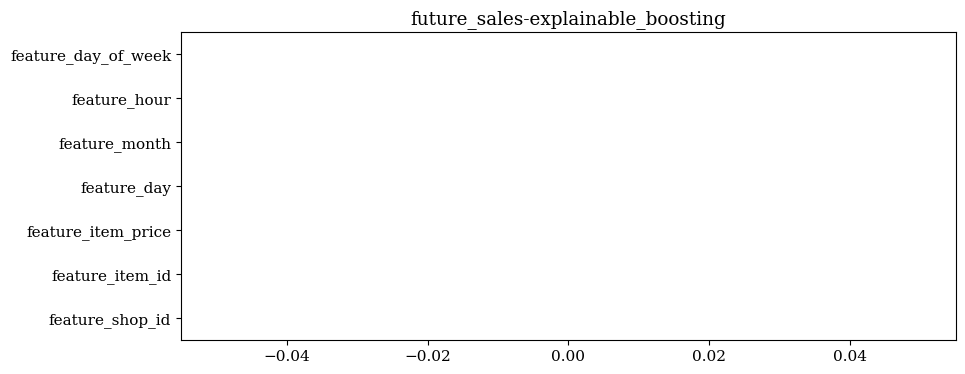

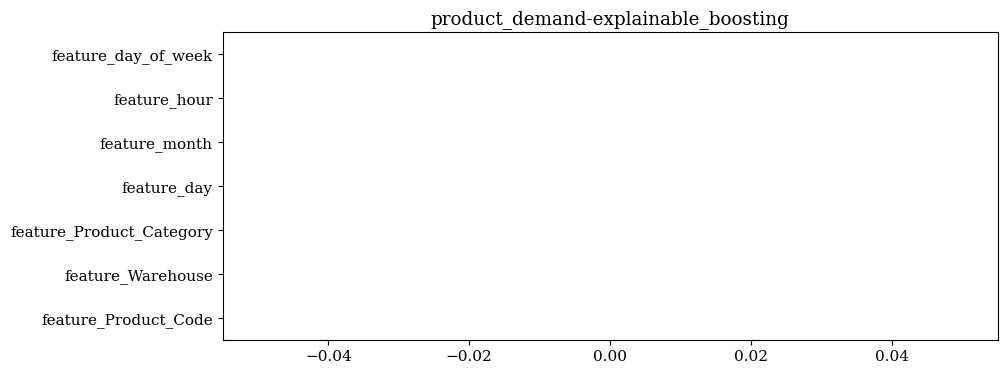

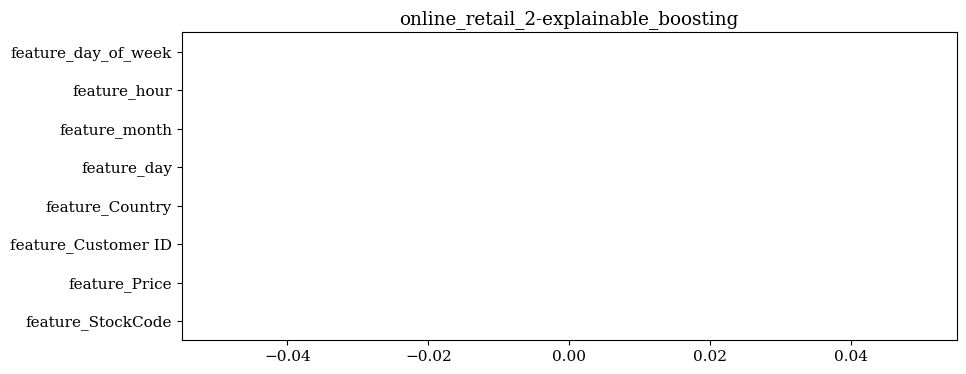

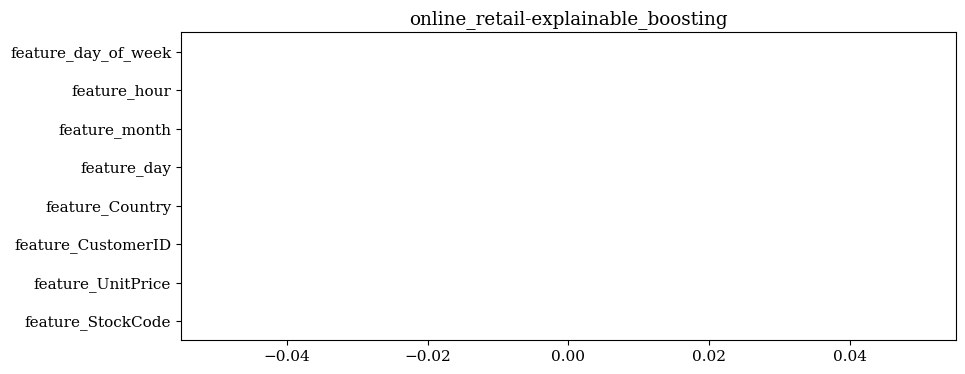

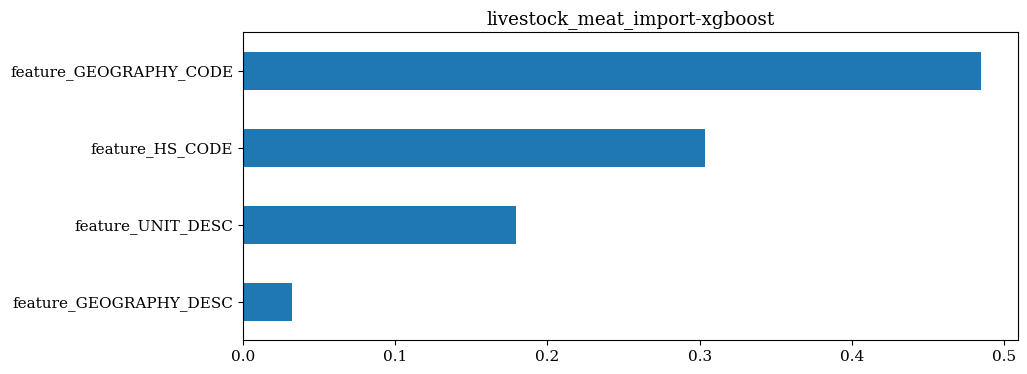

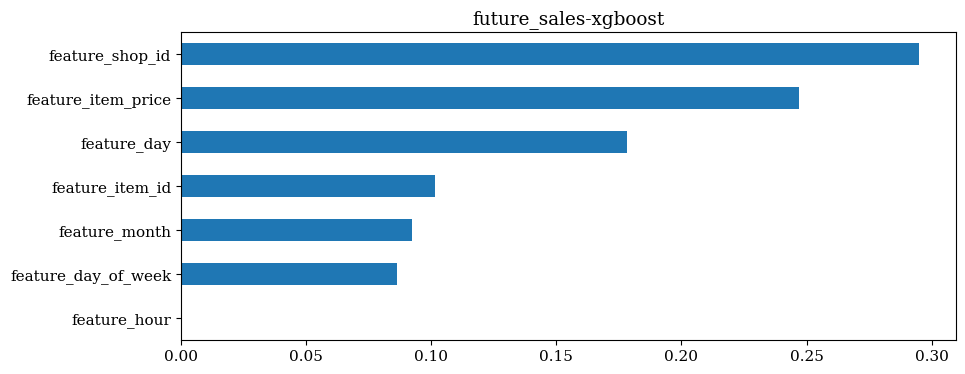

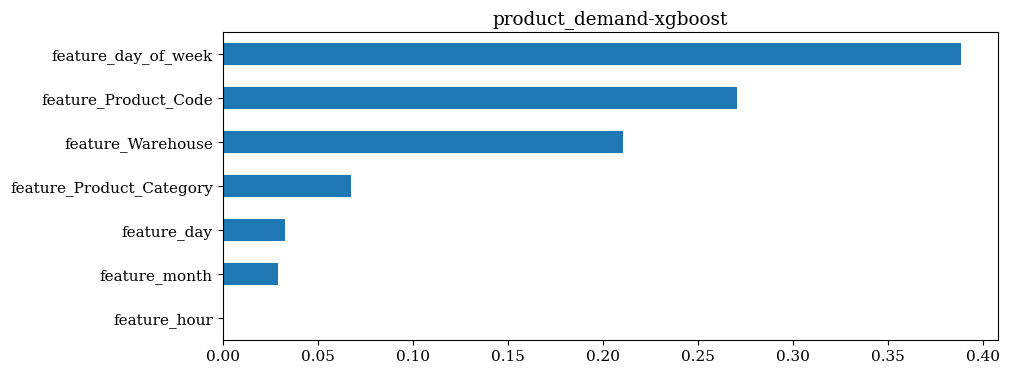

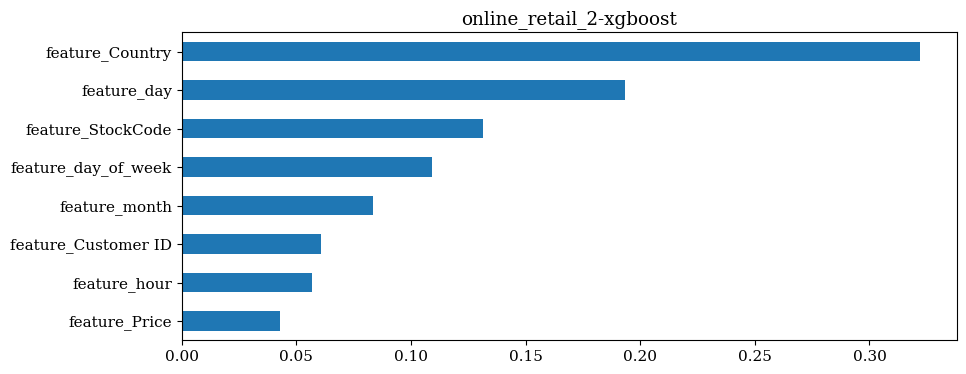

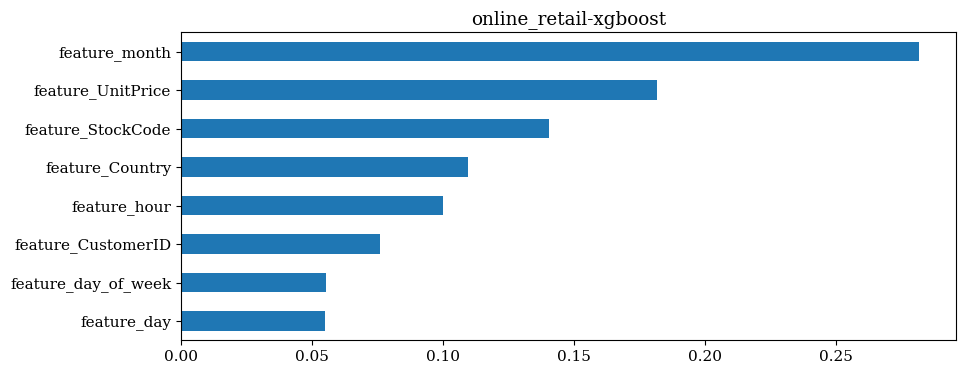

In [32]:
for model in df["model"].unique():
    for dataset_name in df["dataset"].unique():
        plt.figure(figsize=(10, 4))
        cols = [c for c in dataset_cols[dataset_name]]
        # cols.extend(['model', 'dataset', 'extra_feat'])
        dfk = df[(df['model']== model) & (df['dataset'] == dataset_name) & (df["extra_feat"] == False)][cols].fillna(0).T
        dfk = dfk.sort_values(by=dfk.columns[0])
        ax = dfk.plot.barh(legend=False, ax=plt.subplot(111))
        ax.set_title("%s-%s"%(dataset_name, model))
        ax.set_ylabel("")
        plt.show()
        

In [2]:
df = pd.read_excel("all-results-trimed.xlsx")

In [3]:
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,time_period_train_txt,train_size,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse
0,13.6min,816.0,livestock_meat_import,False,5,tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,10196 days 00:00:00,189732,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06
1,11.4min,684.0,livestock_meat_import,False,5,ssl+tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,10196 days 00:00:00,189732,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00
3,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,735 days 00:00:00,2348679,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00
4,26.6min,1596.0,product_demand,False,7,tabnet,1037336,207468,2193 days 00:00:00,410 days 00:00:00,1783 days 00:00:00,829868,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04


array(['livestock_meat_import', 'future_sales', 'product_demand',
       'online_retail_2', 'online_retail'], dtype=object)

## Duration Analysis

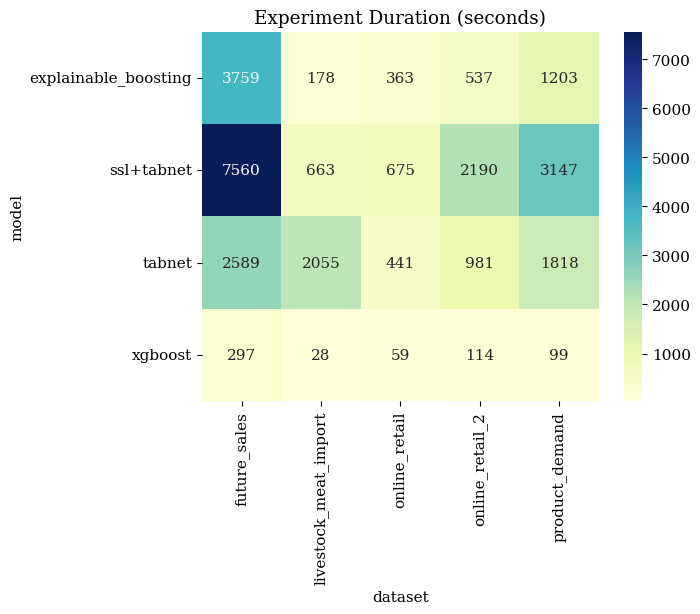

In [26]:
plt.title("Experiment Duration (seconds)")
sns.heatmap(df.pivot_table(index="model", columns="dataset", values="Duration Seconds", aggfunc="mean"), cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()

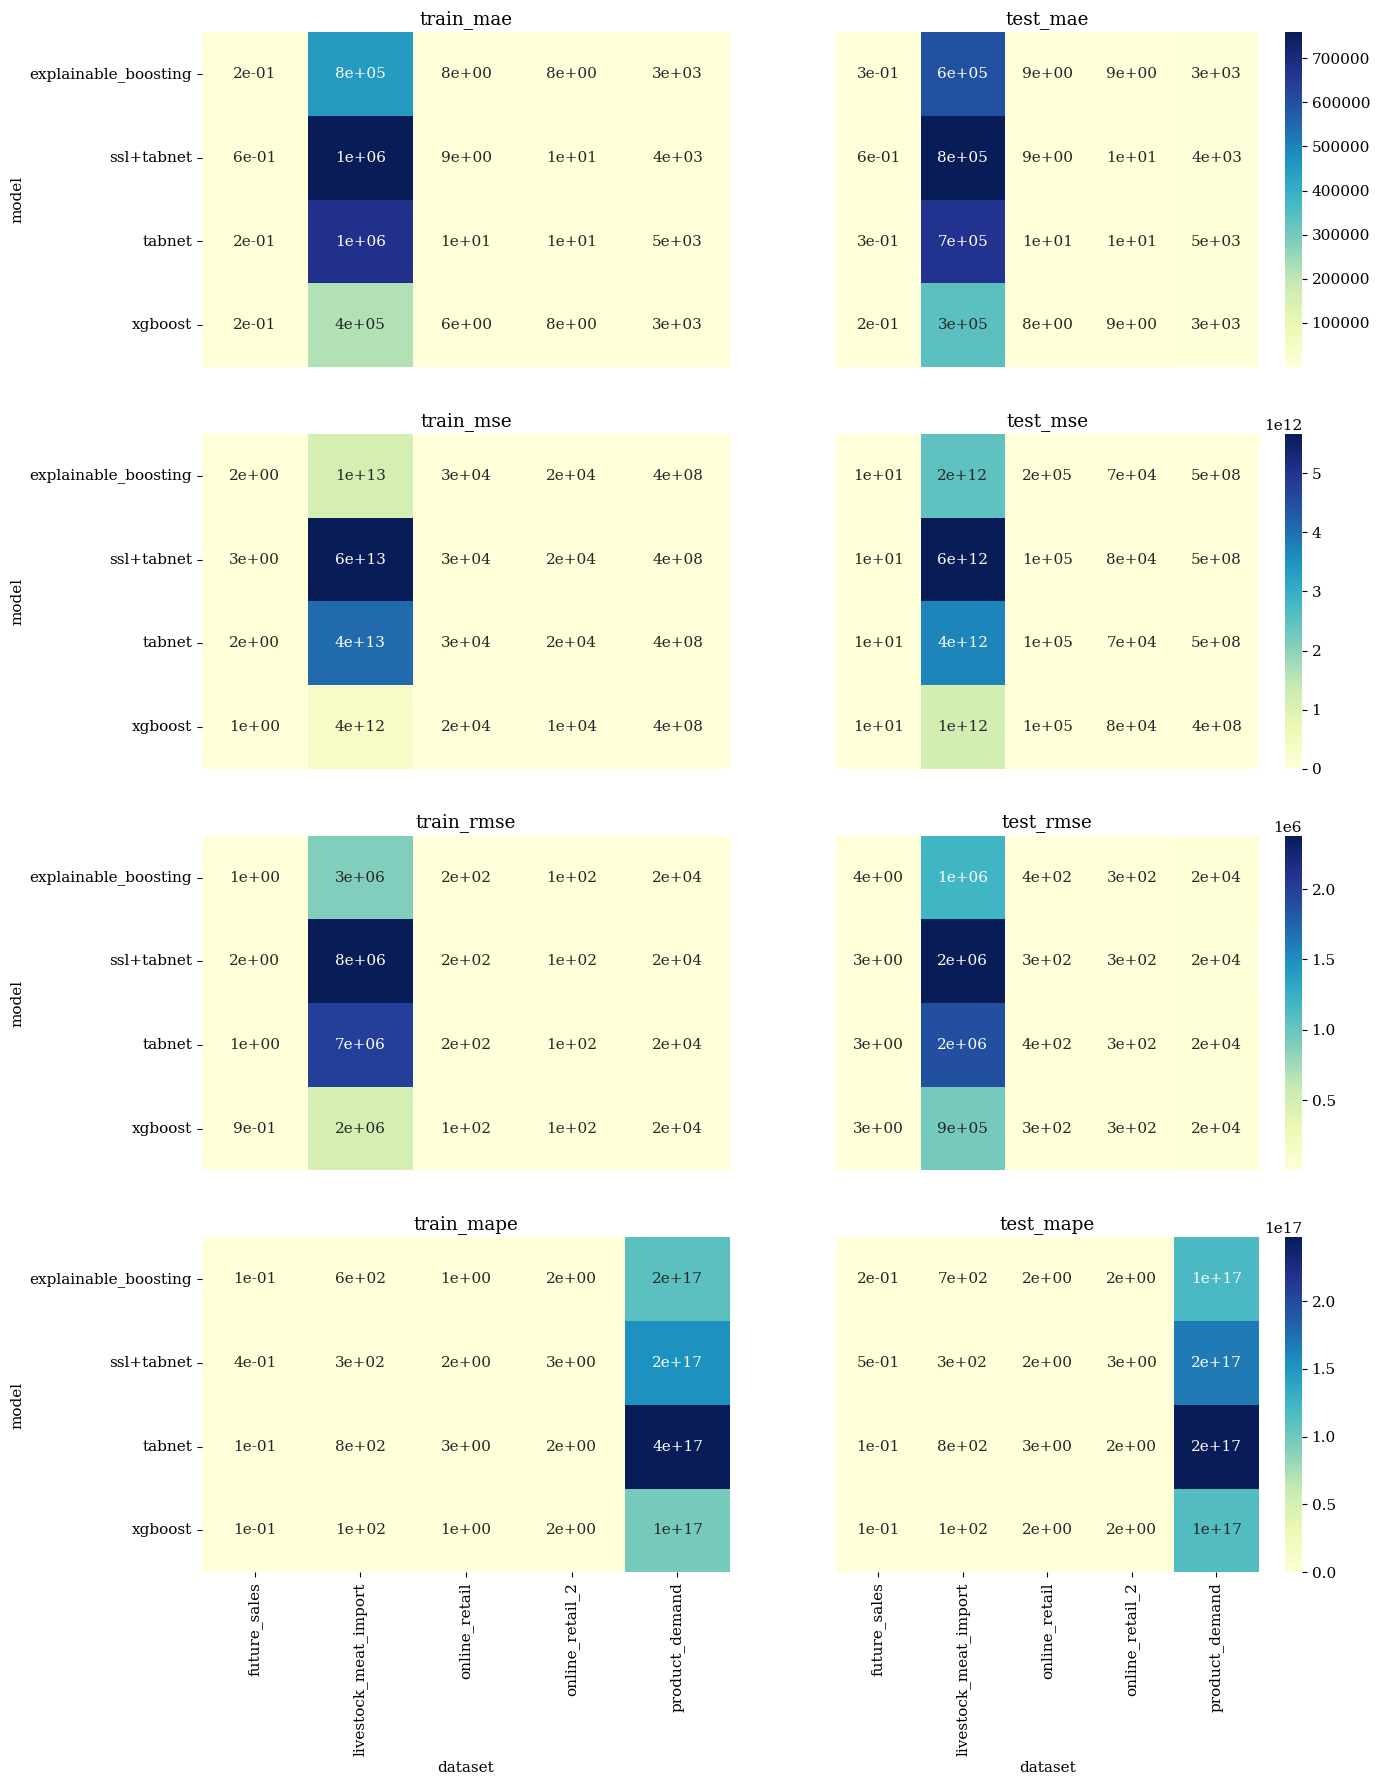

In [70]:
metrics_pair = [
    ["test_mae", "train_mae", 1], ["test_mse", "train_mse", 1], ["test_rmse", "train_rmse", 1], ["test_mape", "train_mape", 1]
]
df2 = df.copy()
idx = 1
plt.figure(figsize=(15, 20))
for metrcs in metrics_pair:
    b, a, step = metrcs
    df2[a] = df2[a] / step
    df2[b] = df2[b] / step
    ax = plt.subplot(4,2,idx)
    ax.set_title(f"{a}")
    sns.heatmap(df.pivot_table(index="model", columns="dataset", values=a, aggfunc="mean"), cmap="YlGnBu", annot=True, fmt="0.0e", ax=ax, cbar=False)
    if idx != 7:
        ax.set_xlabel("")
        ax.set_xticks([])
    
    ax = plt.subplot(4,2, idx+1)
    ax.set_title(f"{b}")
    sns.heatmap(df.pivot_table(index="model", columns="dataset", values=b, aggfunc="mean"), cmap="YlGnBu", annot=True, fmt="0.0e", ax=ax)
    ax.set_yticks([])
    ax.set_ylabel("")
    if idx != 7:
        ax.set_xlabel("")
        ax.set_xticks([])
    idx += 2
plt.savefig("heatmap-errors.png")
plt.show()

In [4]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0006199a33deb49fexubmG8pT2OgqAzL" style="height: auto">\n    <head>…

In [5]:
# pyg.walk(df)
path = r"/Users/soumensardar/Library/CloudStorage/GoogleDrive-soumensardarintmain@gmail.com/.shortcut-targets-by-id/1zlA8VX-l_IufCZSfJIfxohpsEGrcLx4-/Taniya Paul Thesis paper/writing/Figures and Charts"

In [6]:
datasets = df['dataset'].unique()
models = df['model'].unique()
datasets

array(['livestock_meat_import', 'future_sales', 'product_demand',
       'online_retail_2', 'online_retail'], dtype=object)

In [7]:
metrics_pair = [
    ["test_mae", "train_mae"], ["test_mse", "train_mse"], ["test_mape", "train_mape"], ["train_rmse", "test_rmse"]
]

In [8]:
df["feature_count_category"] = df["feature_count"].apply(lambda x: "<=10" if x <= 10 else ">10")
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,...,train_size,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse,feature_count_category
0,13.6min,816.0,livestock_meat_import,False,5,tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,189732,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06,<=10
1,11.4min,684.0,livestock_meat_import,False,5,ssl+tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,189732,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06,<=10
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,2348679,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00,<=10
3,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,2348679,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00,<=10
4,26.6min,1596.0,product_demand,False,7,tabnet,1037336,207468,2193 days 00:00:00,410 days 00:00:00,...,829868,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04,<=10


/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/163414886.py:13: UserWarning

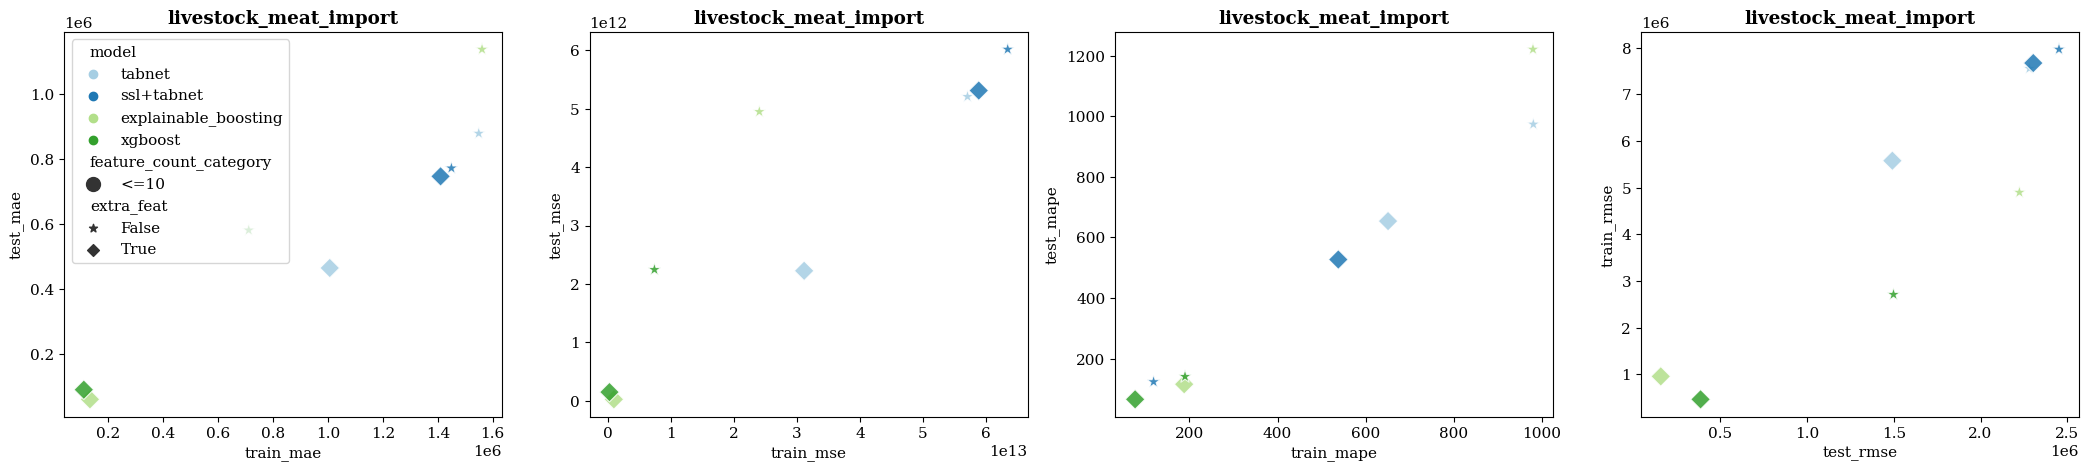

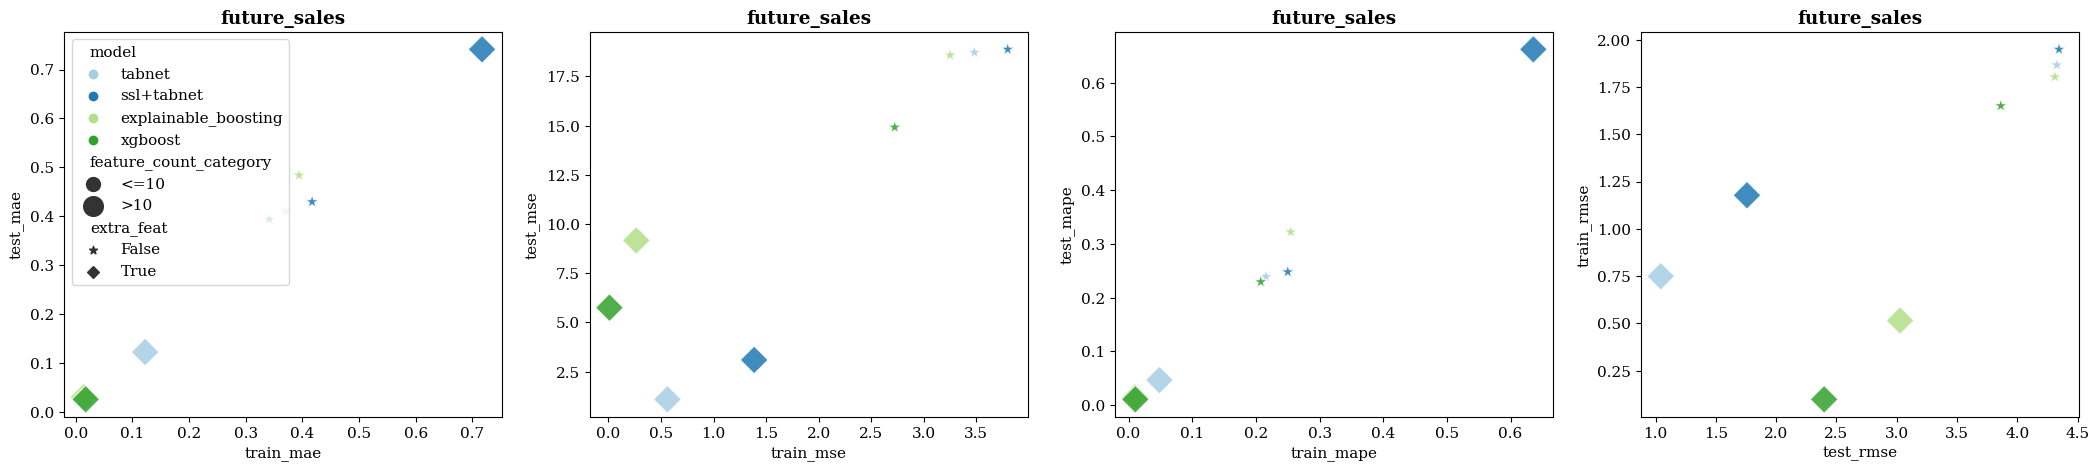

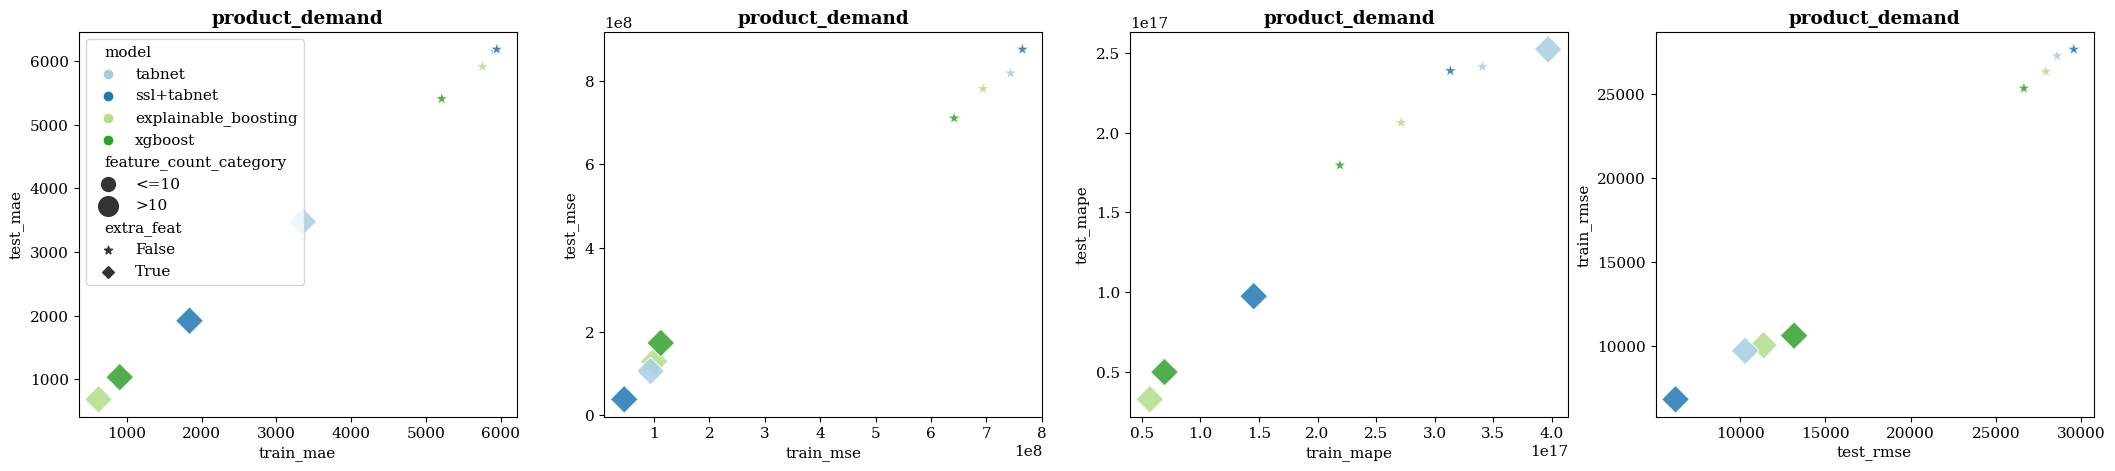

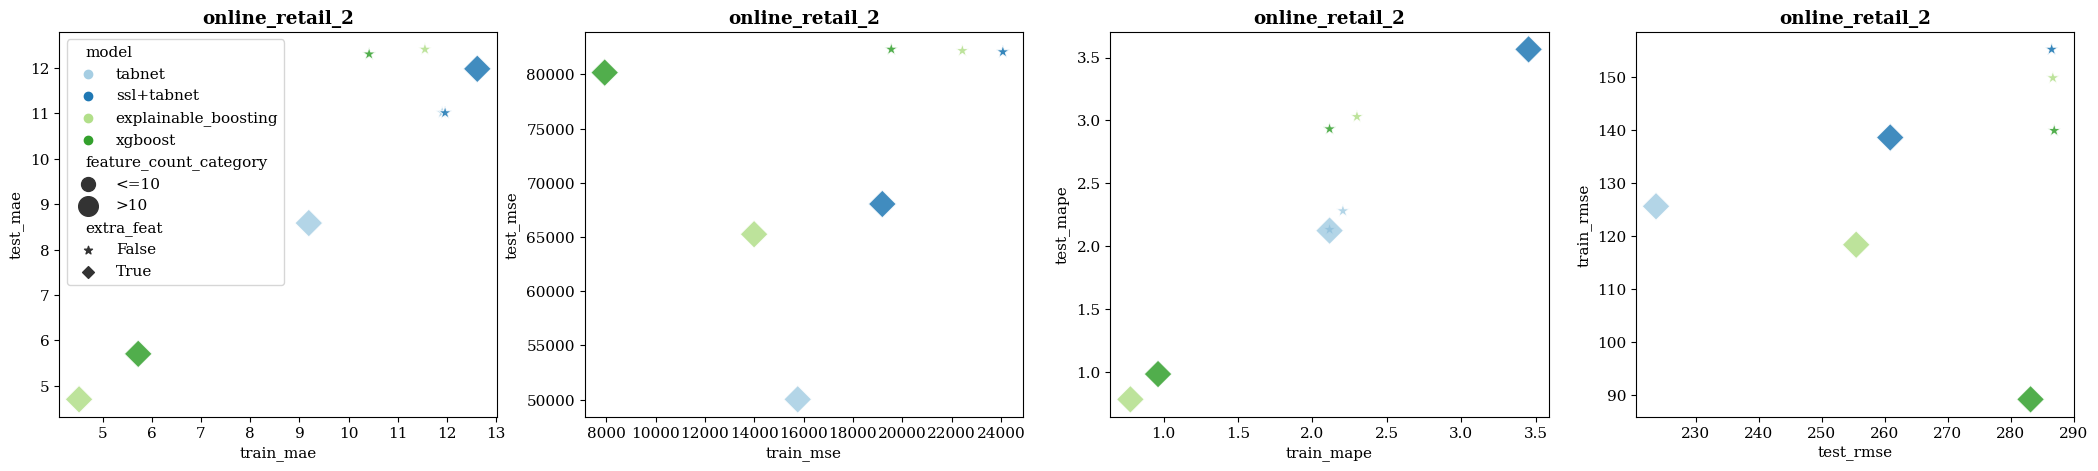

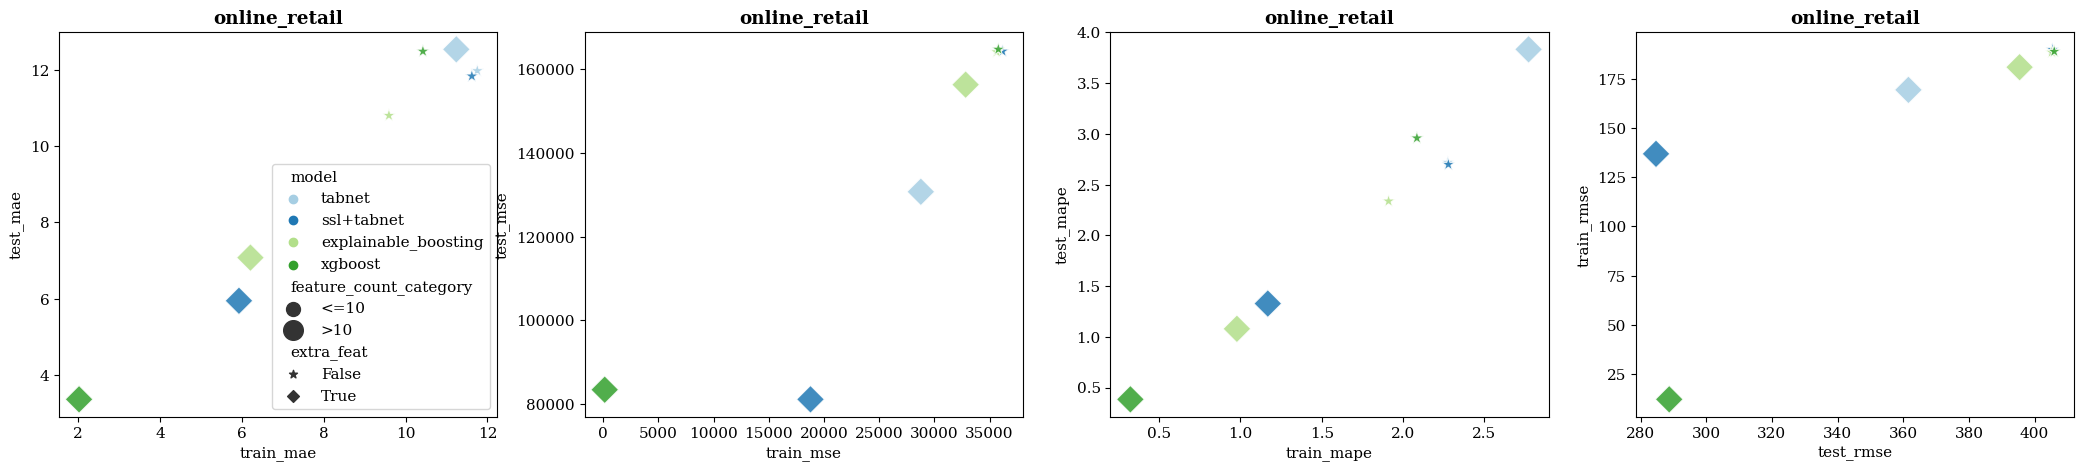

In [9]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
markers = {True:'D', False:'*'}
for dataset in datasets:
    idx = 1
    plt.figure(figsize=(26, 5))
    for y,x in metrics_pair:
        ax = plt.subplot(1, 4, idx)
        ax.set_title("%s"%dataset, fontdict=dict(fontweight="bold"))
        g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category", 
                            sizes=[100, 200],alpha=.85,markers=markers,palette="Paired",
                            ax = ax, legend=("auto" if idx==1 else None))
        idx += 1
    plt.savefig(f"{path}/result/{dataset}-scatter.png")
    plt.show()

/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category",
/var/folders/2x/kb1y9tvx01j9226b9fd1y13r0000gn/T/ipykernel_895/966997674.py:13: UserWarning

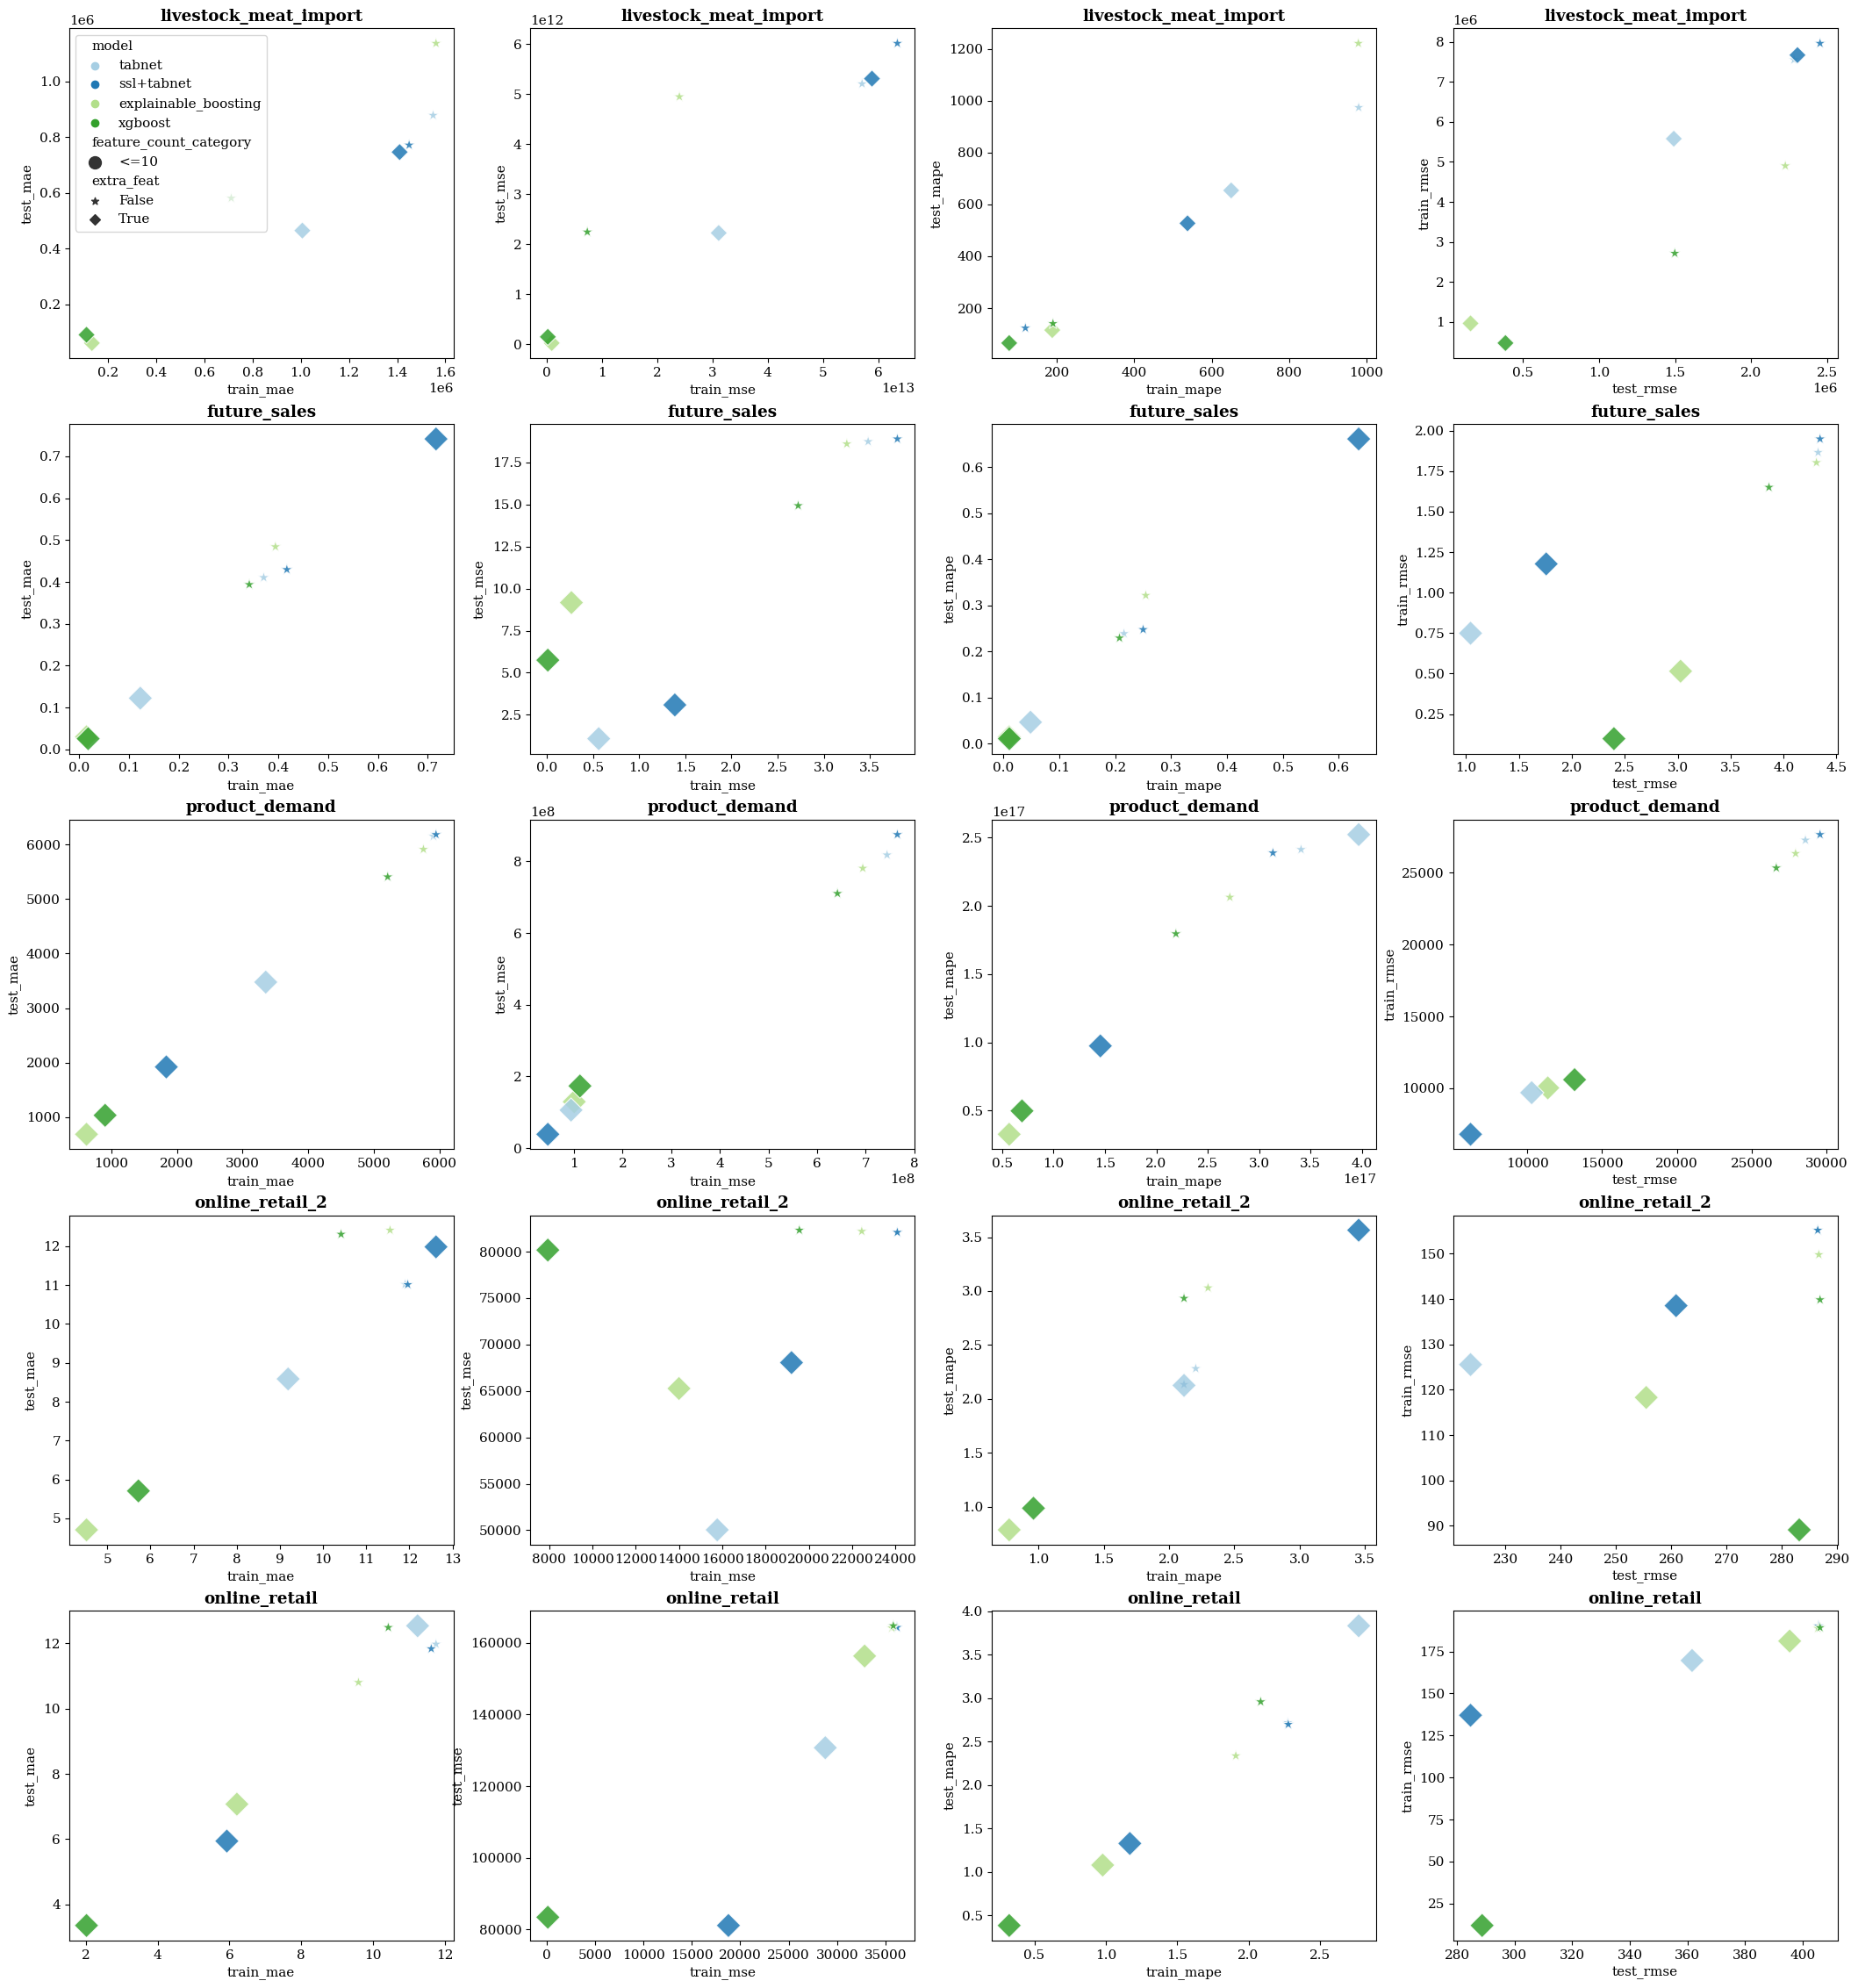

In [10]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
markers = {True:'D', False:'*'}
idx = 1
plt.figure(figsize=(26, 40))
for dataset in datasets:
    for y,x in metrics_pair:
        ax = plt.subplot(n_rows+2, n_cols, idx)
        ax.set_title("%s"%dataset, fontdict=dict(fontweight="bold"))
        g = sns.scatterplot(data=df[df["dataset"] == dataset], x=x, y=y, hue="model", style="extra_feat", size="feature_count_category", 
                            sizes=[100, 200],alpha=.85,markers=markers,palette="Paired",
                            ax = ax, legend=("auto" if idx==1 else None))
        idx += 1
    # plt.savefig(f"{path}/result/{dataset}-scatter.png")
plt.savefig(f"{path}/result/all-scatter.png")
plt.show()

- mae: LMI error huge across all models
- mse: LMI error huge across all models
- rmse: LMI error huge across all models
- all models: MAE, MSE, RMSE is high for LMI dataset
- all models: MAPE error is high for PD dataset
- all models: performed poorly for LMI dataset

 # fc - feature count

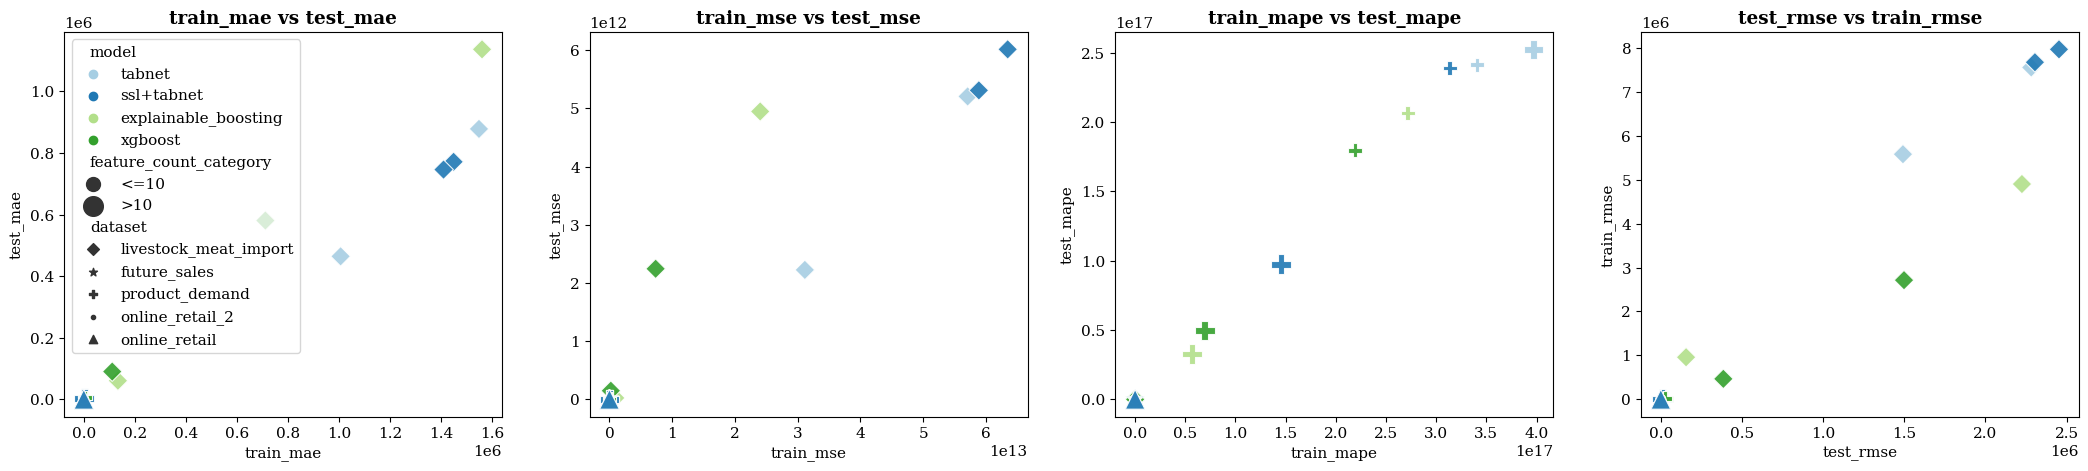

In [11]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
# markers = {True:'D', False:'*'}
markers = {'livestock_meat_import':'D', 'future_sales':'*', 'product_demand':'P',
       'online_retail_2':'.', 'online_retail':'^'}

# for dataset in datasets:
idx = 1
plt.figure(figsize=(26, 5))
for y,x in metrics_pair:
    ax = plt.subplot(1, 4, idx)
    ax.set_title(f"{x} vs {y}", fontdict=dict(fontweight="bold"))
    g = sns.scatterplot(data=df, x=x, y=y, hue="model", style="dataset", size="feature_count_category", 
                        sizes=[100, 200],alpha=.9,markers=markers,palette="Paired",
                        ax = ax, legend=("auto" if idx==1 else None))
    idx += 1
plt.savefig(f"{path}/result/{x}-{y}-fc-scatter.png") # fc - feature count
plt.show()

In [12]:
df["train_size"].value_counts()

train_size
189732     8
2348679    8
829868     8
659491     8
325463     8
Name: count, dtype: int64

In [13]:
df["train_size_category"] = df["train_size"].apply(lambda x: "100K-500K" if x <= 500_000 else ("500K-1M" if x <= 1_000_000 else "2M"))
df.head()

,Duration,Duration Seconds,dataset,extra_feat,feature_count,model,total size,test_size,time_period_sec_txt,time_period_test_txt,...,test_mae,test_mape,test_mse,test_rmse,train_mae,train_mape,train_mse,train_rmse,feature_count_category,train_size_category
0,13.6min,816.0,livestock_meat_import,False,5,tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,878282.656787,9.736134e+02,5.206301e+12,2.281732e+06,1.549047e+06,9.802483e+02,5.708591e+13,7.555522e+06,<=10,100K-500K
1,11.4min,684.0,livestock_meat_import,False,5,ssl+tabnet,237165,47433,12691 days 00:00:00,2495 days 00:00:00,...,771421.501378,1.230842e+02,6.015429e+12,2.452637e+06,1.449515e+06,1.185925e+02,6.346991e+13,7.966800e+06,<=10,100K-500K
2,42.1min,2526.0,future_sales,False,7,tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,0.410407,2.389662e-01,1.872326e+01,4.327038e+00,3.706080e-01,2.156763e-01,3.481449e+00,1.865864e+00,<=10,2M
3,2.6h,9360.0,future_sales,False,7,ssl+tabnet,2935849,587170,1033 days 00:00:00,298 days 00:00:00,...,0.429454,2.477705e-01,1.887979e+01,4.345088e+00,4.170997e-01,2.499798e-01,3.798161e+00,1.948887e+00,<=10,2M
4,26.6min,1596.0,product_demand,False,7,tabnet,1037336,207468,2193 days 00:00:00,410 days 00:00:00,...,6150.640694,2.413361e+17,8.178646e+08,2.859833e+04,5.908238e+03,3.407598e+17,7.440833e+08,2.727789e+04,<=10,500K-1M


# ts-train size

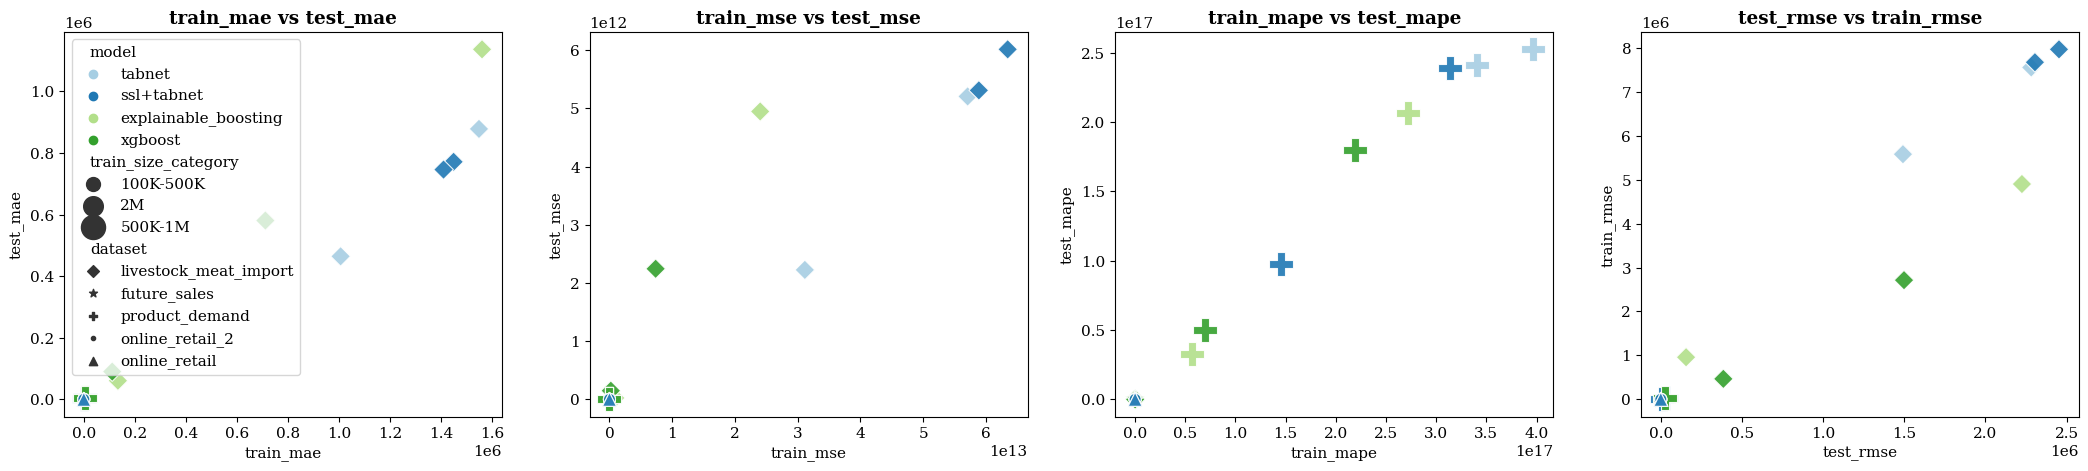

In [14]:
n_plots = len(datasets)*len(metrics_pair)
n_cols = 4
n_rows = n_plots // 4

# markers = {'tabnet':'T', 'ssl+tabnet':'+', 'explainable_boosting':'.', 'xgboost':'x'}
# markers = {True:'D', False:'*'}
markers = {'livestock_meat_import':'D', 'future_sales':'*', 'product_demand':'P',
       'online_retail_2':'.', 'online_retail':'^'}

# for dataset in datasets:
idx = 1
plt.figure(figsize=(26, 5))
for y,x in metrics_pair:
    ax = plt.subplot(1, 4, idx)
    ax.set_title(f"{x} vs {y}", fontdict=dict(fontweight="bold"))
    g = sns.scatterplot(data=df, x=x, y=y, hue="model", style="dataset", size="train_size_category", 
                        sizes=[100, 200, 300],alpha=.9,markers=markers,palette="Paired",
                        ax = ax, legend=("brief" if idx==1 else None))
    idx += 1
plt.savefig(f"{path}/result/{x}-{y}-ts-scatter.png")# ts-train size
plt.show()